<a href="https://colab.research.google.com/github/Wishva23/Machine-learning-/blob/main/Car_worth_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, pipeline, preprocessing

import pylab as pl
import itertools

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)


## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [2]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [3]:
df.shape

(804, 12)

In [4]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [5]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [6]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [7]:
X = df[['Mileage']].values #array of features
y = df['Price'].values #array of targets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
X_train.shape, X_test.shape

((643, 1), (161, 1))

In [ ]:
# from sklearn.preprocessing import StandardScaler ## standrard scalig 
# scaler = StandardScaler() #initialise to a variable
# scaler.fit(X_train) # we are finding the values of mean and sd from the td
# X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
# X_test_scaled = scaler.transform(X_test) # transform the test data 

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
regressor.intercept_ # c 

25455.075694354713

In [11]:
regressor.coef_

array([-0.2084968])

In [12]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(X_train,y_train))
regressor.score(X_train,y_train)

R2- SCORE: -1.959503203402098


0.02878055161597759

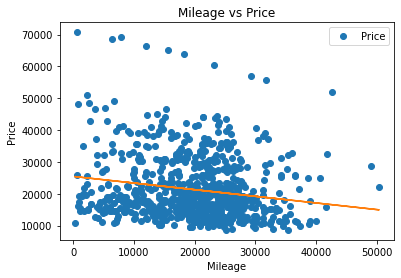

In [17]:
df.plot(x='Mileage', y='Price', style='o')
plt.plot(X, regressor.predict(X))
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [18]:
y_pred = regressor.predict(X_test) 
y_pred

array([19743.51426636, 21382.92463025, 20667.15510472, 18596.36485493,
       20821.23424232, 23584.85936928, 22256.10924222, 19652.60966015,
       21472.57825564, 20140.70067654, 23147.22457928, 19717.03517235,
       20338.14714921, 23254.39193614, 18124.9535828 , 21580.99659333,
       18089.71762305, 22487.95768743, 20768.2760543 , 19215.80885736,
       20869.81399747, 20487.43086033, 21844.53655263, 23164.52981395,
       21092.28008653, 20437.18313075, 24268.72888391, 24554.78649796,
       19354.45923152, 25290.7802134 , 20986.36371049, 20818.94077748,
       19532.09850788, 25274.72595955, 24973.86507247, 24308.55177333,
       23550.45739675, 19095.50620189, 21823.6868723 , 23239.79715992,
       23850.69279341, 19567.33446763, 20544.35048761, 20171.97519703,
       17933.76201423, 21614.77307545, 21455.48151778, 21737.57769256,
       23299.63574245, 19991.62546222, 24976.57553092, 20061.47189131,
       20262.46280963, 24339.61779701, 20876.48589518, 21051.4147131 ,
      

In [22]:
df1 = pd.DataFrame({'price': y_test, 'milage': y_pred})
df1

,price,milage
0,11961.619958,19743.514266
1,16551.219566,21382.924630
2,23345.329069,20667.155105
3,17808.198996,18596.364855
4,10386.040218,20821.234242
...,...,...
156,19646.717478,21049.121248
157,20512.094091,21987.148366
158,10770.106554,20229.103321
159,11539.048533,17332.457234


## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [44]:
X = df[['Mileage','Cylinder','Liter','Sound','Cruise','Leather','Doors']].values #array of features
y = df['Price'].values #array of targets

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((643, 7), (161, 7), (643,), (161,))

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
regressor.intercept_ # c 


6357.229388549074

In [49]:
regressor.coef_

array([-1.86639305e-01,  3.90014745e+03, -9.12437743e+02, -1.81146205e+03,
        6.50401323e+03,  3.50734355e+03, -1.47442342e+03])

In [51]:
from sklearn import metrics 
regressor.score(X_train,y_train)

0.4545746985680684

#Feature selection

##RFE

In [52]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['Mileage','Cylinder','Liter','Sound','Cruise','Leather','Doors'],selector.support_))

[('Mileage', False),
 ('Cylinder', True),
 ('Liter', False),
 ('Sound', False),
 ('Cruise', True),
 ('Leather', True),
 ('Doors', False)]

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [79]:
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])
df_with_dummies

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
X = df_with_dummies[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']].values #array of features
y = df_with_dummies['Price'].values #array of targets

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((643, 18), (161, 18), (643,), (161,))

In [83]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [84]:
regressor.intercept_

24093.150971801417

In [85]:
regressor.coef_

array([-1.86244686e-01, -1.37306916e+03,  5.95836886e+03, -2.05591171e+03,
        8.72428932e+01,  3.28084635e+02,  3.36500380e+02, -3.70035068e+03,
       -5.27150404e+03, -5.46619574e+03,  6.75125741e+03,  1.23966972e+04,
       -4.70990412e+03, -1.73443029e+03, -5.68497758e+03,  2.47255336e+03,
       -1.76607892e+03,  6.71293343e+03])

In [86]:
regressor.score(X_train,y_train)

0.9365810173467172

8 ['Mileage'] 0.9365810173467172


In [ ]:
combos = []
features = ['Mileage','Cylinder','Liter','Sound','Cruise','Leather','Doors']

for i in range(1, 11):
    combos.append(itertools.combinations(features, i))   

check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        degrees = 8

        for degree in range(degrees):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
            
            model = regressor.fit(X_train,y_train)
            model_score = regressor.score(X_train,y_train)
        if check_score < regressor.score(X_train,y_train):
            check_score = regressor.score(X_train,y_train)
            maxgroup = groupx
            best_degree =degree     

print(degrees, maxgroup, check_score)